# **EDA** 

+ Luego de realizar una exploración entre los distintos Datasets provistos por https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/ , se decidió utilizar los siguientes Datasets ya que creemos que son los que están mas alineados con el enfoque de análisis que queremos dar.

 A continuación se realizara un Exploratory Data Analysis (EDA) para conocer en profundidad los datos con el fin de cumplir los objetivos provistos.

In [282]:
# Librerias a utilizar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Congirugamos el estilo de seaborn
sns.set(style="darkgrid", font_scale=1.2, rc={"figure.figsize":(8,4)})
import requests


---

# **Datasets a utilizar**

####  Algunos de los datasets seran ingestados a través de iterar en una api, otros no pudieron obtenerse de esta forma por lo que seran ingestados via CSV

---

In [283]:
# Llave de la api
api_key = "nbxsVHbOnkzqM6sjQ6s5DGfng0ufScUE9AFcopog"
# Lista de parámetros
lista_api = ["VELOC-PROME-DE-BAJAD-DE","ACCES-A-INTER-FIJO-23248","ACCES-A-INTER-FIJO-POR","CONEC-AL-SERVI-DE-INTER","INGRE-TRIME-POR-LA-96059","INGRE-TRIME-POR-LA-PREST","INGRE-TRIME-POR-LA-86109"]
# Lista vacía para ingresar los dataframes de cada iteración
lista_dfs = []
# Iteraremos para realizar distintas llamadas a la api por cada parámetro de la lista
for elemento in lista_api :
    print(elemento)
    url = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{elemento}/data.ajson/?auth_key={api_key}"
    response = requests.get(url)
    data = response.json()["result"][1:]
    headers = response.json()["result"][0]
    df = pd.DataFrame(data, columns=headers)
    lista_dfs.append(df)

# Renombramos cada dataframe
df_media_mb = lista_dfs[0]
df_acceso_por_mb = lista_dfs[1]
df_acceso_por_servicio = lista_dfs[2]    
df_localidades = lista_dfs[3]

df_telefonia = lista_dfs[4]
df_movil = lista_dfs[5]
df_tv = lista_dfs[6]

VELOC-PROME-DE-BAJAD-DE
ACCES-A-INTER-FIJO-23248
ACCES-A-INTER-FIJO-POR
CONEC-AL-SERVI-DE-INTER
INGRE-TRIME-POR-LA-96059
INGRE-TRIME-POR-LA-PREST
INGRE-TRIME-POR-LA-86109


## Penetración de Internet fijo (accesos por cada 100 hogares)
Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia

+ `KPI` a desarrollar : Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [284]:
# Ingestamos el csv
df_accesos_por_hogar = pd.read_csv("Datasets/Internet_Penetracion.csv")
df_accesos_por_hogar

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


In [285]:
# Transformamos la variable "Accesos por cada 100 hogares" en tipo de dato decimal para observarla mejor
df_accesos_por_hogar["Accesos por cada 100 hogares"] = df_accesos_por_hogar["Accesos por cada 100 hogares"].str.replace(",",".")
df_accesos_por_hogar["Accesos por cada 100 hogares"] = df_accesos_por_hogar["Accesos por cada 100 hogares"].astype(float) 

In [286]:
# Descripción general de los datos
df_accesos_por_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [287]:
# Resumen estadístico de las columnas numéricas
df_accesos_por_hogar.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


In [288]:
# Resumen estadístico de las columnas categoricas
df_accesos_por_hogar.describe(exclude='number')

,Provincia
count,840
unique,24
top,Buenos Aires
freq,35


In [289]:
# Para ver duplicados
colums = df_accesos_por_hogar.columns
n_duplicados = df_accesos_por_hogar.drop(labels=colums,axis=1).duplicated().sum()
n_duplicados

0

In [290]:
# Creamos el KPI
# Filtrar los datos para el trimestre más reciente y calcular el promedio de accesos por cada 100 hogares
trimestre2_2022 = df_accesos_por_hogar[(df_accesos_por_hogar['Año'] == 2022) & (df_accesos_por_hogar['Trimestre'] == 2)]

# Calcula el número de hogares adicionales que necesitas alcanzar en cada provincia para aumentar en un 2% el acceso al servicio de internet:
hogares_adicionales = trimestre2_2022['Accesos por cada 100 hogares'] * 0.02

# Suma los hogares adicionales a los accesos actuales para obtener la meta de acceso al servicio de internet para el trimestre 3 de 2022:
objetivo = trimestre2_2022['Accesos por cada 100 hogares'] + hogares_adicionales
objetivo = objetivo.round(2)

# Agrega la columna de Provincia a la lista de columnas a mostrar:
columnas = ['Provincia', 'Accesos por cada 100 hogares', 'Objetivo para T3 2022']

# Crea un nuevo dataframe con la información deseada:
df_objetivo_t3_2022 = pd.DataFrame({
    'Provincia': trimestre2_2022['Provincia'],
    'Accesos por cada 100 hogares': trimestre2_2022['Accesos por cada 100 hogares'],
    'Objetivo para T3 2022': objetivo
})

print(df_objetivo_t3_2022[columnas])


              Provincia  Accesos por cada 100 hogares  Objetivo para T3 2022
24         Buenos Aires                         77.58                  79.13
25      Capital Federal                        121.31                 123.74
26            Catamarca                         62.40                  63.65
27                Chaco                         43.79                  44.67
28               Chubut                         83.19                  84.85
29              Córdoba                         87.48                  89.23
30           Corrientes                         48.35                  49.32
31           Entre Ríos                         63.90                  65.18
32              Formosa                         43.42                  44.29
33                Jujuy                         57.32                  58.47
34             La Pampa                         92.98                  94.84
35             La Rioja                         80.14                  81.74

### **`visualizaciones`**

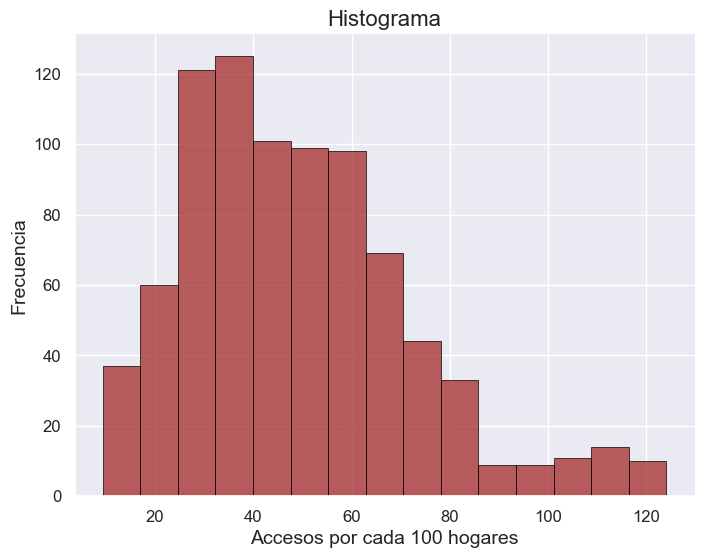

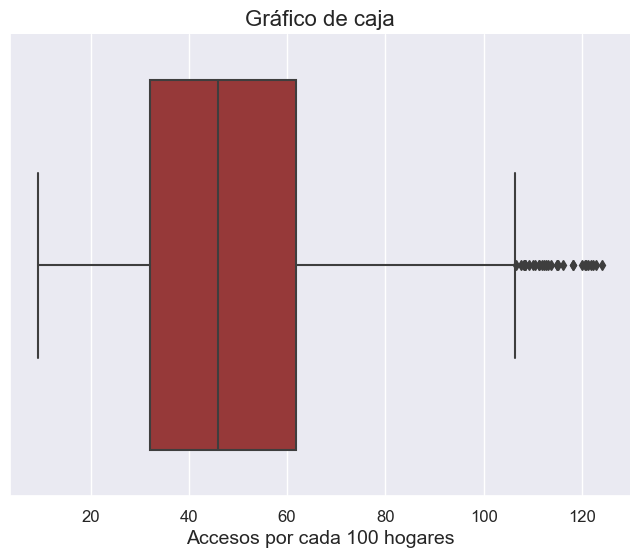

In [291]:
# Histograma de una variable numérica
plt.figure(figsize=(8,6))
sns.histplot(df_accesos_por_hogar["Accesos por cada 100 hogares"], bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("Accesos por cada 100 hogares", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Gráfico de caja de una variable numérica
plt.figure(figsize=(8,6))
sns.boxplot(x=df_accesos_por_hogar["Accesos por cada 100 hogares"], color="brown")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("Accesos por cada 100 hogares", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

# En ambos se pueden observar bastantes valores atípicos

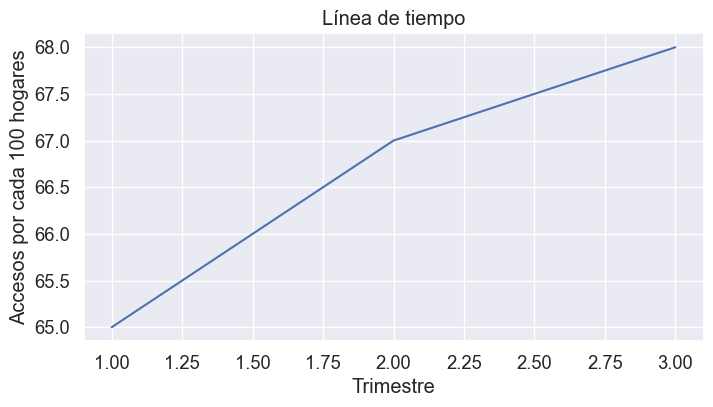

In [292]:
# Hacemos una query para graficar la media de los accesos por cada 100 hogares, agrupado por año
graf1 = df_accesos_por_hogar[["Año","Trimestre","Accesos por cada 100 hogares"]].groupby(["Año","Trimestre"]).mean().reset_index().sort_values(by="Accesos por cada 100 hogares",ascending=False)
graf1 = graf1[graf1["Año"] == 2022]
graf1["Accesos por cada 100 hogares"] = graf1["Accesos por cada 100 hogares"].astype(int)

# Luego la graficamos en una linea de tiempo
fig, ax = plt.subplots(figsize=(8, 4)) 
sns.lineplot(x="Trimestre", y="Accesos por cada 100 hogares", data=graf1, ax=ax) 

# Añadimos etiquetas y titulo
ax.set_xlabel('Trimestre')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Línea de tiempo')

# Mostrar el gráfico
plt.show()

# Se puede observar como va en aumento la variable "Accesos por cada 100 hogares" en función del tiempo

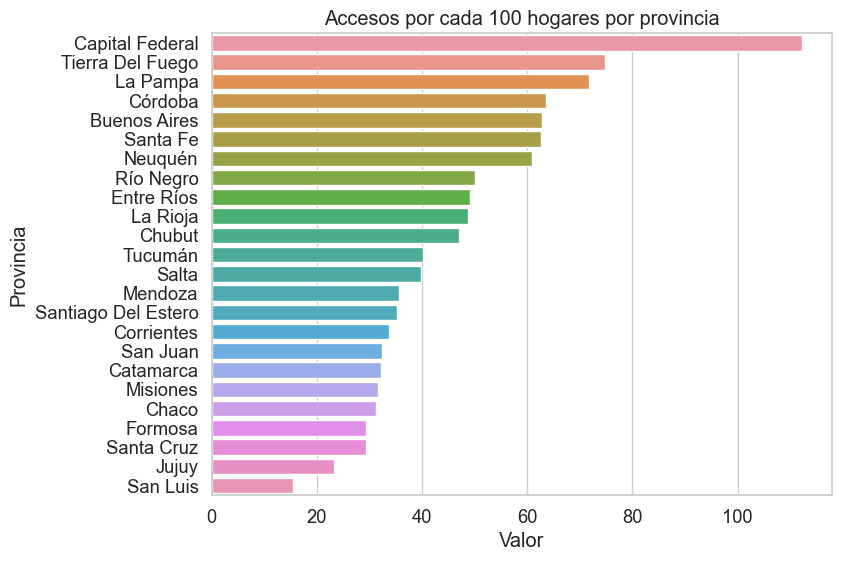

In [293]:
# Hacemos una query para ver ordenado por provincia los accesos utilizando la mediana
graf2 = df_accesos_por_hogar[["Provincia","Accesos por cada 100 hogares"]].groupby("Provincia").median().reset_index().sort_values(by="Accesos por cada 100 hogares",ascending=False)

# Configurar el estilo de la gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})

# Creamos un grafico de barras horizontal
ax = sns.barplot(x='Accesos por cada 100 hogares', y='Provincia', data=graf2)

# Añadimos las etiquetas y el título
ax.set_xlabel('Valor')
ax.set_ylabel('Provincia')
ax.set_title('Accesos por cada 100 hogares por provincia')

# Mostrar el gráfico
plt.show()


---

# Ingresos trimestrales por la prestación del servicio de Internet fijo

+ `KPI` a desarrollar : Cuánto aumentan los ingresos por año (en porcentaje) y ARPU = (Ingresos totales en un período determinado) / (Número total de usuarios en el mismo período)

In [294]:
# Cargamos el csv y observamos
df_ingresos = pd.read_csv("Datasets/Internet_Ingresos.csv")
df_ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021
5,2021,2,38.239.667,Abr-Jun 2021
6,2021,1,36.676.371,Ene-Mar 2021
7,2020,4,33.539.703,Oct-Dic 2020
8,2020,3,31.997.445,Jul-Sept 2020
9,2020,2,32.102.476,Abr-Jun 2020


In [295]:
# Reemplazamos el caracter para poder cambiar el tipo de dato
df_ingresos["Ingresos (miles de pesos)"] = df_ingresos["Ingresos (miles de pesos)"].str.replace(".","", regex=False)
# Colocamos tipo de dato correcto
df_ingresos["Ingresos (miles de pesos)"] = df_ingresos["Ingresos (miles de pesos)"].astype(int)
df_ingresos["Año"] = df_ingresos["Año"].astype(int)
df_ingresos["Trimestre"] = df_ingresos["Trimestre"].astype(int)

In [296]:
# Descripción general de los datos
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int32 
 1   Trimestre                  35 non-null     int32 
 2   Ingresos (miles de pesos)  35 non-null     int32 
 3   Periodo                    35 non-null     object
dtypes: int32(3), object(1)
memory usage: 832.0+ bytes


In [297]:
# Resumen estadístico de las columnas numéricas
df_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


In [298]:
# Resumen estadístico de todas las columnas
df_ingresos.describe(exclude='number')

,Periodo
count,35
unique,35
top,Jul-Sept 2022
freq,1


In [299]:
# Para ver duplicados
colums = df_ingresos.columns
n_duplicados = df_ingresos.drop(labels=colums,axis=1).duplicated().sum()
n_duplicados

0

## **`visualizaciones`**

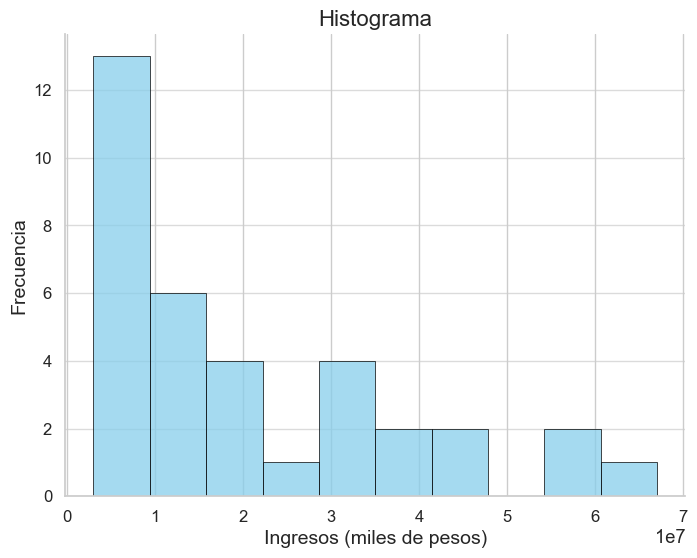

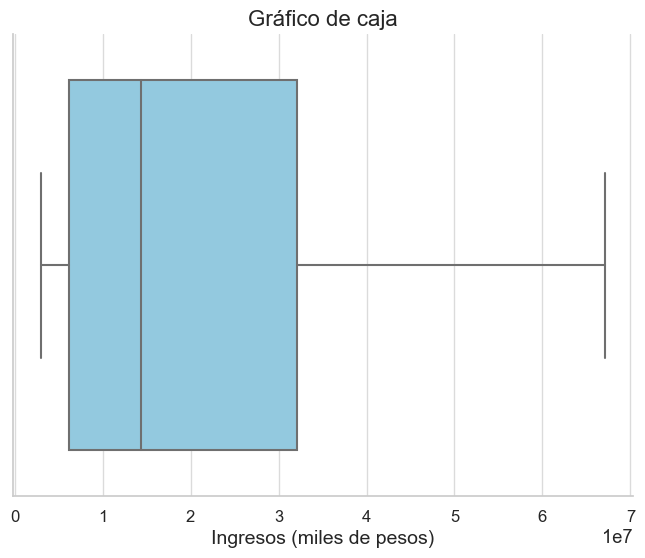

In [300]:
# Histograma de una variable numérica
plt.figure(figsize=(8,6))
sns.histplot(df_ingresos["Ingresos (miles de pesos)"], bins=10, edgecolor='black', linewidth=0.5, color = "skyblue")
plt.title("Histograma", fontsize=16)
plt.xlabel("Ingresos (miles de pesos)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)
sns.despine()
plt.show()

# Gráfico de caja de una variable numérica
plt.figure(figsize=(8,6))
sns.boxplot(x=df_ingresos["Ingresos (miles de pesos)"], color="skyblue")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("Ingresos (miles de pesos)", fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='x', alpha=0.7)
sns.despine()
plt.show()

# Se pueden observar unos pocos valores atípicos

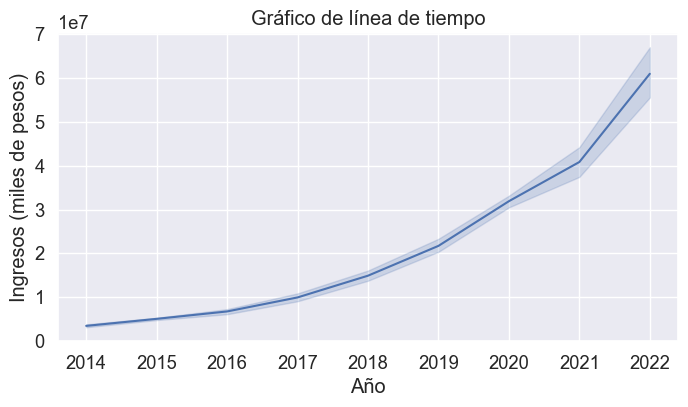

In [301]:
# Crear un gráfico de línea de tiempo
sns.set(style="darkgrid", font_scale=1.2, rc={"figure.figsize":(8,4)}) # Configurar estilo
fig, ax = plt.subplots(figsize=(8, 4)) # Crear una figura y un eje
sns.lineplot(x="Año", y="Ingresos (miles de pesos)", data=df_ingresos, ax=ax) # Crear la línea de tiempo

# Añadir etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Ingresos (miles de pesos)')
ax.set_title('Gráfico de línea de tiempo')

# Mostrar el gráfico
plt.show()

# Se puede observar un crecimiento exponencial para los últimos años

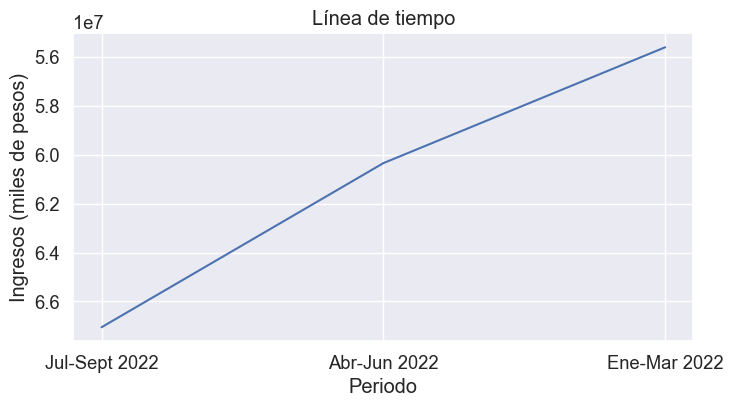

In [302]:
# Observamos según trimestre
trim = df_ingresos[df_ingresos["Año"] == 2022]

# Graficamos
fig, ax = plt.subplots(figsize=(8, 4)) # Crear una figura y un eje
sns.lineplot(x="Periodo", y="Ingresos (miles de pesos)", data=trim, ax=ax) # Crear la línea de tiempo

# Añadir etiquetas y título
ax.set_xlabel('Periodo')
ax.set_ylabel('Ingresos (miles de pesos)')
ax.set_title('Línea de tiempo')
ax.invert_yaxis()


# Mostrar el gráfico
plt.show()

# Se puede observar un crecimiento casi lineal de los ingresos en funcion de los periodos de un mismo año

In [303]:
# Calculamos el crecimiento anual de ingresos
# Sumamos los ingresos por año
ingresos_por_año = df_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum()

# Observamos la suma de ingresos por año
print("ingresos por año: ",ingresos_por_año)

# Calculamos el porcentaje de cambio de un año a otro utilizando la fórmula: ((valor actual - valor anterior) / valor anterior) * 100
porcentaje_cambio = (ingresos_por_año.pct_change() * 100).round(2)

# Mostramos el porcentaje de cambio de los ingresos de un año a otro, redondeado a dos decimales. 2013 da nulo ya que no tiene una año anterior con el cual comparar
print("porcentaje de cambio por año en %: ",porcentaje_cambio)

# Se puede observar que hubo un gran aumento en los primeros años, pero fue descendiendo en los últimos

ingresos por año:  Año
2014     13683949
2015     20108814
2016     26867508
2017     39671973
2018     59539594
2019     86772531
2020    127585840
2021    163383869
2022    182981651
Name: Ingresos (miles de pesos), dtype: int32
porcentaje de cambio por año en %:  Año
2014      NaN
2015    46.95
2016    33.61
2017    47.66
2018    50.08
2019    45.74
2020    47.03
2021    28.06
2022    11.99
Name: Ingresos (miles de pesos), dtype: float64


In [304]:
# Calculamos el ARPU
# Filtrar el dataset para los trimestres de 2022
df_ingresos_2022 = df_ingresos[(df_ingresos['Año'] == 2022)& (df_ingresos["Trimestre"] == 3)]
hogares = (df_accesos_por_hogar["Accesos por cada 100 hogares"] * df_accesos_por_hogar["Accesos por cada 100 hogares"]) / 100
# Sumar los ingresos de todos los trimestres de 2022
total_ingresos_2022 = df_ingresos_2022['Ingresos (miles de pesos)'].sum()
# Calcular el ARPU en pesos argentinos
arpu_ars_2022 = total_ingresos_2022 / hogares

# Imprimir el resultado
print('El ARPU en pesos argentinos en 2022 es:', round(arpu_ars_2022, 2))

El ARPU en pesos argentinos en 2022 es: 0       1099066.36
1        448462.70
2       1571129.10
3       3485779.69
4        941798.83
          ...     
835     8006452.59
836     2928689.34
837    25207470.53
838     1638643.53
839     6003773.49
Name: Accesos por cada 100 hogares, Length: 840, dtype: float64


---

# Velocidad media de bajada de Internet fijo por provincia
Serie histórica de la velocidad media de descarga de Internet por provincia (trimestral)

+ `KPI` a desarrollar : Cual es la velocidad media por pais

In [305]:
# Observamos, "Mbps (Media de bajada)" refiere a la velocidad de descarga del internet
df_media_mb.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),,
0,2022,3,Buenos Aires,70.19,,
1,2022,3,Capital Federal,101.05,,
2,2022,3,Catamarca,60.99,,
3,2022,3,Chaco,53.21,,
4,2022,3,Chubut,15.57,,


In [306]:
# Descripción general de los datos
df_media_mb.info()

# Se puede observar que el campo "Mbps (Media de bajada)" no tiene el tipo de dato correcto
df_media_mb["Mbps (Media de bajada)"] = df_media_mb["Mbps (Media de bajada)"].astype(float)
# Ademas se pueden observar 2 columnas sin datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    object
 1   Trimestre               840 non-null    object
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    object
 4                           840 non-null    object
 5                           840 non-null    object
dtypes: object(6)
memory usage: 39.5+ KB


In [307]:
# Resumen estadístico de las columnas numéricas
df_media_mb.describe()

# Se puede obtener mucha información

,Mbps (Media de bajada)
count,840.000000
mean,13.857238
std,14.666514
min,2.570000
25%,4.250000
50%,7.095000
75%,18.317500
max,101.050000


In [308]:
# Resumen estadístico de todas las columnas
df_media_mb.describe(exclude='number')


,Año,Trimestre,Provincia,,
count,840,840,840,840,840
unique,9,4,24,1,1
top,2021,3,Buenos Aires,,
freq,96,216,35,840,840


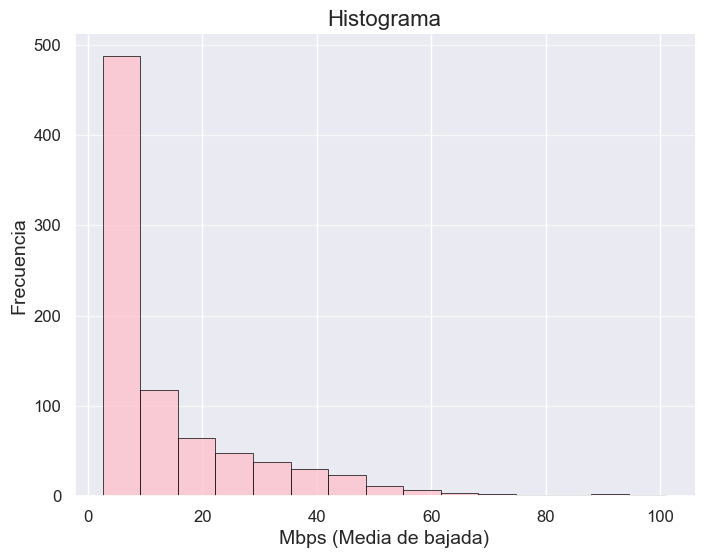

In [309]:
# Histograma de una variable numérica
plt.figure(figsize=(8,6))
sns.histplot(df_media_mb["Mbps (Media de bajada)"], bins=15, edgecolor='black', linewidth=0.5, color = "pink")
plt.title("Histograma", fontsize=16)
plt.xlabel("Mbps (Media de bajada)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.7)
sns.despine()
plt.show()

# Se puede observar mucha frecuencia en valores bajos y algunos valores atípicos altos

In [310]:
# Nos gustaria observar como cambia esta variable en función del tiempo, por lo cual agruparemos
query = df_media_mb[["Año","Mbps (Media de bajada)"]].groupby("Año").mean().sort_values(by="Mbps (Media de bajada)",ascending = False).reset_index()

# Se puede observar un crecimiento muy notorio y gradual según año
query


,Año,Mbps (Media de bajada)
0,2022,37.221528
1,2021,28.680625
2,2020,22.261771
3,2019,14.012708
4,2018,9.741250
5,2017,6.325521
6,2016,4.787083
7,2015,4.125938
8,2014,3.399792


---

# Acceso a Internet Fijo por rangos de velocidad de bajada y provincia
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia (trimestral)

+ `KPI` a desarrollar : A que velocidad tiene mas acceso cada provincia / Velocidad de conexión más popular

In [311]:
# Observamos
df_acceso_por_mb

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,"29,985","27,709","290,315","297,915","267,044","124,190","3,618,689","65,821","4,721,668"
1,2022,3,Capital Federal,517,"5,742","34,371","67,829","51,946","28,692","1,253,105","105,477","1,547,679"
2,2022,3,Catamarca,71,384,"3,107","5,389","5,099","3,737","50,298","2,208","70,293"
3,2022,3,Chaco,461,987,"16,782","18,938","8,049","15,828","79,390","3,711","144,146"
4,2022,3,Chubut,109,"1,444","45,707","30,940","34,682","15,309","17,563","20,024","165,778"
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,161,"1,625","24,972",1,1,0,0,0,"26,760"
836,2014,1,Santa Fe,"8,456","124,468","345,225","20,328","6,845",23,668,0,"506,013"
837,2014,1,Santiago Del Estero,"1,234","10,531","22,817","2,422",109,0,0,0,"37,113"
838,2014,1,Tierra Del Fuego,12,607,"30,902",6,0,0,0,0,"31,527"


In [312]:
# Observamos y se pueden ver valores vacios
df_acceso_por_mb["OTROS"].value_counts()

0         449
            6
2,151       6
6,105       5
1,035       5
         ... 
10,867      1
1,483       1
15,371      1
6,328       1
14,119      1
Name: OTROS, Length: 316, dtype: int64

In [313]:
# Reempazamos por 0
df_acceso_por_mb.replace('', "0", inplace=True)
df_acceso_por_mb.dropna(inplace=True)

In [314]:
df_acceso_por_mb.info()

# Colocaremos el tipo de dato correcto para realizar observaciones
serv_mb = ["HASTA 512 kbps","+ 512 Kbps - 1 Mbps","+ 1 Mbps - 6 Mbps","+ 6 Mbps - 10 Mbps","+ 10 Mbps - 20 Mbps","+ 20 Mbps - 30 Mbps","+ 30 Mbps","OTROS","Total"]
for elemento in serv_mb:
    df_acceso_por_mb[elemento] = df_acceso_por_mb[elemento].str.replace(",","")
    df_acceso_por_mb[elemento] = df_acceso_por_mb[elemento].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    object
 1   Trimestre            840 non-null    object
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    object
 4   + 512 Kbps - 1 Mbps  840 non-null    object
 5   + 1 Mbps - 6 Mbps    840 non-null    object
 6   + 6 Mbps - 10 Mbps   840 non-null    object
 7   + 10 Mbps - 20 Mbps  840 non-null    object
 8   + 20 Mbps - 30 Mbps  840 non-null    object
 9   + 30 Mbps            840 non-null    object
 10  OTROS                840 non-null    object
 11  Total                840 non-null    object
dtypes: object(12)
memory usage: 78.9+ KB


In [315]:
# Observamos los cambios
df_acceso_por_mb.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778


In [316]:
# Sumamos todas las columnas agrupando por provincia
df_filtrado_mb = df_acceso_por_mb[["Año","Provincia","HASTA 512 kbps","+ 512 Kbps - 1 Mbps","+ 1 Mbps - 6 Mbps","+ 6 Mbps - 10 Mbps","+ 10 Mbps - 20 Mbps","+ 20 Mbps - 30 Mbps","+ 30 Mbps","OTROS","Total"]].groupby(["Año","Provincia"]).sum().reset_index()
df_filtrado_mb

,Año,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2014,Buenos Aires,30952,594642,9100616,622326,268741,1730,17984,0,10636993
1,2014,Capital Federal,5237,311169,4272677,383273,261481,1099,27258,0,5262192
2,2014,Catamarca,78,34883,55007,8412,707,0,1,0,99088
3,2014,Chaco,1731,58271,166439,23398,5700,139,2,0,255680
4,2014,Chubut,13387,19091,244360,104,0,0,0,0,276942
...,...,...,...,...,...,...,...,...,...,...,...
211,2022,Santa Cruz,155,20580,37400,34184,35540,7415,10747,1776,147797
212,2022,Santa Fe,1404,35324,415039,611330,229817,173587,1114410,56237,2637148
213,2022,Santiago Del Estero,534,4186,88158,180083,44235,2642,31323,2376,353537
214,2022,Tierra Del Fuego,68,2556,36903,45283,58104,5231,3009,9123,160277


In [317]:
# Sacamos el porcentaje del total
for elemento in serv_mb : 
    df_filtrado_mb[elemento] = (df_filtrado_mb[elemento]/df_filtrado_mb["Total"]) 
    df_filtrado_mb[elemento] = df_filtrado_mb[elemento].astype(str)
    df_filtrado_mb[elemento] = df_filtrado_mb[elemento].str.replace(".",",",regex=False)
df_filtrado_mb   
# Se puede observar que velocidad es la que tiene mas porcentaje según provincia y año

,Año,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2014,Buenos Aires,"0,002909844915757677","0,05590320497531586","0,8555628456275189","0,05850582020689494","0,02526475292406416","0,0001626399490908756","0,001690703378294975","0,0","1,0"
1,2014,Capital Federal,"0,0009952126414239542","0,05913296208120114","0,8119576404661784","0,07283523672264335","0,049690509202248795","0,00020884832784512613","0,005179970628209689","0,0","1,0"
2,2014,Catamarca,"0,0007871790731471016","0,3520406103665429","0,5551328112384951","0,08489423542709511","0,007135071855320523","0,0","1,0092039399321815e-05","0,0","1,0"
3,2014,Chaco,"0,0067701814768460575","0,22790597622027534","0,6509660513141426","0,09151282853566958","0,02229349186483104","0,0005436483103879849","7,822277847309136e-06","0,0","1,0"
4,2014,Chubut,"0,04833864130395534","0,0689350116630919","0,8823508171386066","0,00037552989434610855","0,0","0,0","0,0","0,0","1,0"
...,...,...,...,...,...,...,...,...,...,...,...
211,2022,Santa Cruz,"0,0010487357659492412","0,13924504556926054","0,2530497912677524","0,23129021563360555","0,2404649620763615","0,05017016583557177","0,07271460178488061","0,012016482066618402","1,0"
212,2022,Santa Fe,"0,0005323933279436725","0,013394773444645503","0,1573817624190982","0,23181482419644253","0,08714603806839813","0,06582376112375946","0,42258151609238465","0,021324931327327854","1,0"
213,2022,Santiago Del Estero,"0,001510450108475209","0,011840344857822519","0,24936003869467693","0,5093752563380919","0,12512127443520762","0,007473050911220042","0,08859893023926774","0,006720654415238009","1,0"
214,2022,Tierra Del Fuego,"0,0004242654903697973","0,015947391079194146","0,23024513810465633","0,28252962059434605","0,3625223831242162","0,032637246766535434","0,01877374794886353","0,05692020689181854","1,0"


In [318]:
# Observaremos las velocidades según el año
año = df_acceso_por_mb.groupby("Año").sum(numeric_only=True).sort_values(by= "Total",ascending = False)

# Pasamos a % 
for elemento in serv_mb : 
    año[elemento] = (año[elemento]/año["Total"]) * 100

# Se puede observar como cambian los valores, por ejemplo en 2014 "+ 30 Mbps" era = %0.202268 y en 2021 = %49.946507
año

,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
Año,,,,,,,,,
2021,0.401870,0.383312,22.671497,11.211052,7.777872,5.832511,49.946507,1.775381,100.0
2020,0.446371,0.519564,28.723378,11.392090,8.724725,5.919661,42.166317,2.107894,100.0
2019,1.825746,1.128221,36.480332,10.760124,12.068951,13.046689,22.387003,2.302935,100.0
2018,0.478328,2.598438,40.429433,11.217399,21.395465,15.537664,5.965521,2.377753,100.0
2022,0.310860,0.921426,11.072268,10.889709,8.103047,4.514235,61.437133,2.751322,100.0
2017,0.257398,2.979959,56.220045,13.469525,19.349932,4.767482,2.437587,0.518072,100.0
2016,0.407374,4.654078,68.890945,12.255526,11.962245,1.398607,0.431224,0.000000,100.0
2015,0.556141,6.991648,75.047804,9.731705,7.208815,0.177920,0.285966,0.000000,100.0
2014,0.688218,9.844174,80.573591,5.892436,2.776925,0.022388,0.202268,0.000000,100.0


---

# Acceso a Internet fijo por tecnología y provincia
Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)

+ `KPI` a desarrollar : Que servicio es el más vendido, y en que provincias / Evolución de servicios por provincia

In [319]:
# Observamos
df_acceso_por_servicio

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,"339,648","2,748,325","1,436,433","126,846","70,416","4,721,668"
1,2022,3,Capital Federal,"140,791","1,240,125","129,218","5,758","31,787","1,547,679"
2,2022,3,Catamarca,"10,010","10,495","46,224","1,329","2,235","70,293"
3,2022,3,Chaco,"27,164","61,800","44,645","8,178","2,359","144,146"
4,2022,3,Chubut,"45,377","72,212","9,574","29,784","8,831","165,778"
...,...,...,...,...,...,...,...,...,...
836,2014,1,Santa Fe,"322,662","174,296","3,059","5,951",644,"506,612"
837,2014,1,Santiago Del Estero,"32,567","3,598",19,915,34,"37,133"
838,2014,1,Tierra Del Fuego,"21,618","2,837",648,1,"2,934","28,038"
839,2014,1,Tucumán,"129,717",83,121,13,98,"130,032"


In [320]:
# Corregimos el registro 840
df_acceso_por_servicio.iloc[840]

Año                                                             *
Trimestre       Los datos provinciales no coinciden a nivel na...
Provincia                                                        
ADSL                                                             
Cablemodem                                                       
Fibra óptica                                                     
Wireless                                                         
Otros                                                            
Total                                                            
Name: 840, dtype: object

In [321]:
# Lo borramos
df_acceso_por_servicio = df_acceso_por_servicio.drop(840)

In [322]:
df_acceso_por_servicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    object
 1   Trimestre     840 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    object
 4   Cablemodem    840 non-null    object
 5   Fibra óptica  840 non-null    object
 6   Wireless      840 non-null    object
 7   Otros         840 non-null    object
 8   Total         840 non-null    object
dtypes: object(9)
memory usage: 59.2+ KB


In [323]:
df_acceso_por_servicio.info()

# Colocaremos el tipo de dato correcto para realizar observaciones
serv = ["ADSL","Cablemodem","Fibra óptica","Otros","Wireless","Total"]
for elemento in serv:
    df_acceso_por_servicio[elemento] = df_acceso_por_servicio[elemento].str.replace(",","")
    df_acceso_por_servicio[elemento] = df_acceso_por_servicio[elemento].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    object
 1   Trimestre     840 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    object
 4   Cablemodem    840 non-null    object
 5   Fibra óptica  840 non-null    object
 6   Wireless      840 non-null    object
 7   Otros         840 non-null    object
 8   Total         840 non-null    object
dtypes: object(9)
memory usage: 59.2+ KB


In [324]:
# Observamos las columnas numericas
df_acceso_por_servicio.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,8.400000e+02,8.400000e+02,8.400000e+02,840.000000,840.000000,8.400000e+02
mean,1.275668e+05,1.717750e+05,2.991186e+04,10345.001190,6142.961905,3.457417e+05
std,2.550543e+05,4.221661e+05,1.235013e+05,18192.024086,10572.152928,7.419436e+05
min,6.842000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2.247925e+04,8.599750e+03,1.860000e+02,253.000000,307.250000,5.202975e+04
50%,4.859600e+04,3.498400e+04,1.093000e+03,4261.500000,1852.000000,1.034895e+05
75%,1.045695e+05,7.074850e+04,1.386250e+04,12435.000000,6915.500000,1.779148e+05
max,1.586343e+06,2.748325e+06,1.436433e+06,126887.000000,73415.000000,4.721668e+06


In [325]:
# Observamos las categoricas
df_acceso_por_servicio.describe(exclude="number")

,Año,Trimestre,Provincia
count,840,840,840
unique,10,7,24
top,2021,3,Buenos Aires
freq,96,192,35


In [326]:
# Observaremos la suma total de servicios por provincia
df_filtrado_servicios = df_acceso_por_servicio[["Año","Provincia","ADSL","Cablemodem","Fibra óptica","Wireless","Otros","Total"]].groupby(["Provincia","Año"]).sum().reset_index()
# Sacamos le porcentaje del total
for elemento in serv : 
    df_filtrado_servicios[elemento] = (df_filtrado_servicios[elemento]/df_filtrado_servicios["Total"]) * 100

In [327]:
# Aquí se puede observar el % por sobre el total
df_filtrado_servicios

# Se puede observar que según la provincia varía el servicio dominante, por ej Buenos Aires = Cablemodem y Tucumán = ADSL

,Provincia,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,Buenos Aires,2014,56.175968,37.663237,4.350518,0.638518,1.171758,100.0
1,Buenos Aires,2015,54.468229,39.930136,4.011559,0.673968,0.916108,100.0
2,Buenos Aires,2016,51.573340,43.195639,3.736656,0.675545,0.818820,100.0
3,Buenos Aires,2017,43.707898,50.288742,3.950091,1.102467,0.950802,100.0
4,Buenos Aires,2018,39.679989,52.595425,5.132789,1.852137,0.739660,100.0
...,...,...,...,...,...,...,...,...
235,Tucumán,2019,73.994181,5.543586,19.922072,0.364975,0.175188,100.0
236,Tucumán,2019 *,92.196456,7.134441,0.069657,0.407193,0.192253,100.0
237,Tucumán,2020,67.897632,4.956386,26.118108,0.728513,0.299362,100.0
238,Tucumán,2021,49.135752,18.527809,31.129056,0.917662,0.289721,100.0


In [328]:
# Agrupamos y filtramos según el año 2022 para ver el estado actual
query10 = df_filtrado_servicios[df_filtrado_servicios["Año"] == '2022']
query10 = query10[["Provincia",'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']]
# Hacemos un melt de pandas para tener los valores de cada servicio
dff = query10.melt("Provincia")
dff.groupby(["Provincia","variable"]).max().reset_index()

,Provincia,variable,value
0,Buenos Aires,ADSL,7.761931
1,Buenos Aires,Cablemodem,58.782568
2,Buenos Aires,Fibra óptica,29.242087
3,Buenos Aires,Wireless,2.719496
4,Capital Federal,ADSL,8.631115
...,...,...,...
91,Tierra Del Fuego,Wireless,0.233346
92,Tucumán,ADSL,33.563103
93,Tucumán,Cablemodem,12.609731
94,Tucumán,Fibra óptica,52.060721


---

# Listado de localidades con conectividad a internet.
Listado de localidades con conectividad a internet, con detalle por tipo de conexión.

+ `KPI` a desarrollar : Cuántas localidades no tienen servicios por provincia

In [329]:
# Antes era ingestado via API, pero al haber cambios en la página de dicha api se perdieron datos del dataset utilizado por la api
# Observamos
df_localidades = pd.read_csv("Datasets/concectividad.csv")
df_localidades.sample(10)

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
1041,SANTA FE,San Cristóbal,La Rubia,299,--,SI,--,--,--,SI,SI,--,--,82091150.0,"-30,1113966728017","-61,7927608545145"
1171,SANTA FE,9 de Julio,Gato Colorado,998,--,--,--,--,SI,--,SI,--,SI,82077020.0,"-28,0245785095892","-61,1879373297868"
2297,ENTRE RIOS,Diamante,Las Jaulas,44,--,--,--,--,--,--,--,--,--,30021127.0,"-31,8327184836082","-60,6048471558247"
1259,SANTA FE,Constitución,Godoy,1189,--,--,--,--,--,SI,SI,SI,SI,82028100.0,"-33,3697098731789","-60,5094130215383"
1176,SANTA FE,9 de Julio,Pozo Borrado,980,--,--,--,--,--,SI,SI,--,SI,82077060.0,"-28,9399423031181","-61,7055999743386"
1612,RIO NEGRO,Avellaneda,Barrio Unión,89,--,--,--,--,--,--,--,--,--,62014010.0,"-39,1585373145235","-66,1856066477135"
3298,CABA,COMUNA 01,SAN TELMO,20453,SI,SI,SI,SI,SI,SI,SI,SI,SI,2000010.0,"-34,6215200115838","-58,3715453876304"
141,CHUBUT,Escalante,Diadema Argentina,1317,--,--,--,--,--,SI,--,SI,SI,26021040.0,"-45,7906089158021","-67,6738925726169"
3732,ENTRE RIOS,Concordia,Estación Yeruá,316,--,--,--,--,--,SI,SI,--,SI,30015080.0,"-31,469433434517","-58,2636681024626"
2382,JUJUY,Valle Grande,San Francisco,504,--,--,--,--,--,--,--,--,--,38105030.0,"-23,6174664054774","-64,9548612286321"


In [330]:
df_localidades.describe()

,Poblacion,link
count,4.312000e+03,4.300000e+03
mean,8.693093e+03,3.909872e+07
std,3.821544e+04,2.939305e+07
min,0.000000e+00,2.000010e+06
25%,1.160000e+02,1.009104e+07
50%,5.755000e+02,3.401053e+07
75%,3.202000e+03,6.612602e+07
max,1.317298e+06,9.401402e+07


In [331]:
# Observamos los valores únicos
df_localidades["Provincia"].unique()

array(['BUENOS AIRES', 'CHUBUT', 'MISIONES', 'CABA', 'CHACO', 'CORDOBA',
       'ENTRE RIOS', 'RIO NEGRO', 'JUJUY', 'FORMOSA', 'LA PAMPA',
       'MENDOZA', 'SALTA', 'NEUQUEN', 'SAN JUAN', 'SAN LUIS', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TUCUMAN', 'TIERRA DEL FUEGO', 'SANTA CRUZ',
       'LA RIOJA', 'CORRIENTES', 'CATAMARCA'], dtype=object)

In [332]:
# La cantidad de localidades por provincia
df_localidades["Provincia"].value_counts()

BUENOS AIRES           901
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             194
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              163
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                117
SAN JUAN               108
LA RIOJA                93
CHACO                   92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: Provincia, dtype: int64

In [333]:
# A continuación calcularemos el porcentaje de localidades sin servicio:

# Así obtenemos solo las localidades que no tengan servicios
df_localidades["servicio"] = df_localidades["SATELITAL"] + df_localidades["WIRELESS"] + df_localidades["TELEFONIAFIJA"] + df_localidades["3G"] + df_localidades["4G"] + df_localidades["FIBRAOPTICA"] + df_localidades["DIALUP"] + df_localidades["CABLEMODEM"] + df_localidades["ADSL"]
localidades = df_localidades[(df_localidades["servicio"] == "------------------")]

# Hacemos una query para observar las localidades sin servicios por provincia
query1 = localidades[["Provincia"]].groupby("Provincia").value_counts().reset_index(name="Sin_servicio")

# Obtener el total de localidades por provincia
df_localidades_por_prov = df_localidades["Provincia"].value_counts().reset_index()
df_localidades_por_prov.columns = ["Provincia", "Total de localidades"]

# Unir los dos DataFrames
df_merged = pd.merge(df_localidades_por_prov, query1[["Provincia","Sin_servicio"]], on="Provincia", how="left")
df_merged["Porcentaje de localidades sin servicios"] = (df_merged["Sin_servicio"] / df_merged["Total de localidades"]) * 100

# Rellenamos Santa Cruz y CABA que tienen 0 localidades sin servicios
df_merged.fillna(0,inplace=True)

# Observamos
df_merged


,Provincia,Total de localidades,Sin_servicio,Porcentaje de localidades sin servicios
0,BUENOS AIRES,901,92.0,10.210877
1,CORDOBA,556,91.0,16.366906
2,SANTA FE,388,20.0,5.154639
3,SAN LUIS,229,124.0,54.148472
4,MENDOZA,210,38.0,18.095238
5,ENTRE RIOS,194,26.0,13.402062
6,CATAMARCA,182,89.0,48.901099
7,SANTIAGO DEL ESTERO,165,32.0,19.393939
8,RIO NEGRO,163,32.0,19.631902
9,JUJUY,160,62.0,38.750000


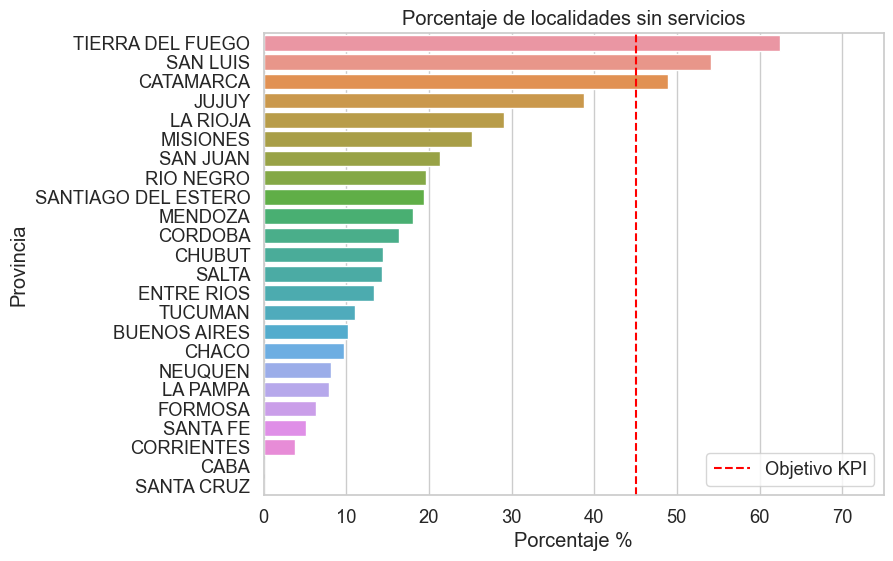

In [334]:
# Ordenamos
df_merged = df_merged.sort_values(by = "Porcentaje de localidades sin servicios",ascending=False)

# Graficamos
# Configurar el estilo de la gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})

# Crear el gráfico de barras horizontal
ax = sns.barplot(x='Porcentaje de localidades sin servicios', y='Provincia', data=df_merged)

# Añadir etiquetas y título
ax.set_title("Porcentaje de localidades sin servicios")
ax.set_xlabel('Porcentaje %')
ax.set_ylabel('Provincia')
# Agregar línea que representa el objetivo del KPI
ax.axvline(x=45, color='red', linestyle='--', label='Objetivo KPI')

# Ajustar el rango del eje x para que se muestre el objetivo del KPI
ax.set_xlim([0, max(df_merged['Porcentaje de localidades sin servicios'])*1.2])

# Agregar leyenda
ax.legend()


# Mostrar el gráfico
plt.show()

# Esta gráfica consideramos que es muy significativa, por ejemplo Buenos Aires tiene 92 localidades sin servicio, pero esto solo es el 10% del total

---

---

# Ingresos trimestrales por la prestación del servicio de telefonía móvil
Ingresos trimestrales de los operadores por el servicio de telefonía móvil

In [335]:
# Observamos
df_movil.head() 

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,"13,135,235",Ene-Mar 2013
1,2013,2,"13,970,806",Abr-Jun 2013
2,2013,3,"15,235,659",Jul-Sept 2013
3,2013,4,"16,218,846",Oct-Dic 2013
4,2014,1,"15,938,353",Ene-Mar 2013


In [336]:
# Observamos y corregimos el tipo de dato
df_movil.info()
df_movil["Ingresos (miles de $)"] = df_movil["Ingresos (miles de $)"].str.replace(",","")
df_movil["Ingresos (miles de $)"] = df_movil["Ingresos (miles de $)"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    39 non-null     object
 1   Trimestre              39 non-null     object
 2   Ingresos (miles de $)  39 non-null     object
 3   Periodo                39 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


In [337]:
# Observamos el promedio de ingresos agrupado por año
df_movil_año = df_movil[["Año","Ingresos (miles de $)"]].groupby("Año").mean().reset_index().sort_values(by = "Ingresos (miles de $)",ascending = False)
df_movil_año

,Año,Ingresos (miles de $)
9,2022,1.525149e+08
8,2021,1.107590e+08
7,2020,7.718249e+07
6,2019,5.797006e+07
5,2018,4.167358e+07
4,2017,3.463414e+07
3,2016,2.691911e+07
2,2015,2.148750e+07
1,2014,1.815193e+07
0,2013,1.464014e+07


# Ingresos trimestrales por la prestación de los servicios de televisión paga
Ingresos trimestrales de los operadores por el servicio de televisión por suscripción y satelital (miles de $)

In [338]:
# Observamos
df_tv.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,"52,242,784.63","27,073,190.89"
1,2022,2,"46,292,673.44","23,559,484.83"
2,2022,1,"42,093,870.19","21,268,086.24"
3,2021,4,"38,273,391.8","18,038,065.44"
4,2021,3,"36,398,025.53","18,039,519.5"


In [339]:
# Observamos y corregimos el tipo de dato
df_tv.info()
df_tv["Ingresos TV por suscripción  (miles de $)"] = df_tv["Ingresos TV por suscripción  (miles de $)"].str.replace(",","")
df_tv["Ingresos TV satelital (miles de $)"] = df_tv["Ingresos TV satelital (miles de $)"].str.replace(",","")
df_tv["Ingresos TV por suscripción  (miles de $)"] = df_tv["Ingresos TV por suscripción  (miles de $)"].astype(float)
df_tv["Ingresos TV satelital (miles de $)"] = df_tv["Ingresos TV satelital (miles de $)"].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Año                                        35 non-null     object
 1   Trimestre                                  35 non-null     object
 2   Ingresos TV por suscripción  (miles de $)  35 non-null     object
 3   Ingresos TV satelital (miles de $)         35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [340]:
# Observamos el promedio de ingresos agrupado por año
df_tv_año = df_tv[["Año","Ingresos TV por suscripción  (miles de $)","Ingresos TV satelital (miles de $)"]].groupby("Año").mean().reset_index().sort_values(by = "Ingresos TV por suscripción  (miles de $)",ascending = False)
df_tv_año

,Año,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
8,2022,4.687644e+07,2.396692e+07
7,2021,3.506773e+07,1.803860e+07
6,2020,2.536943e+07,1.307758e+07
5,2019,1.973547e+07,1.045022e+07
4,2018,1.376113e+07,7.848396e+06
3,2017,1.048770e+07,5.991359e+06
2,2016,7.825429e+06,4.535130e+06
1,2015,5.809434e+06,3.323264e+06
0,2014,4.197047e+06,2.389963e+06


# Ingresos trimestrales por la prestación del servicio de telefonía fija
Ingresos trimestrales de los operadores por el servicio de telefonía fija (miles de $)

In [341]:
# Observamos
df_telefonia.head()

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,"2,916,071.75"
1,2014,2,"2,974,865.2"
2,2014,3,"3,105,462.02"
3,2014,4,"3,339,690.9"
4,2015,1,"3,260,124.75"


In [342]:
# Observamos y corregimos el tipo de dato
df_telefonia.info()
df_telefonia["Ingresos (miles de $)"] = df_telefonia["Ingresos (miles de $)"].str.replace(",","")
df_telefonia["Ingresos (miles de $)"] = df_telefonia["Ingresos (miles de $)"].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    35 non-null     object
 1   Trimestre              35 non-null     object
 2   Ingresos (miles de $)  35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes


In [343]:
# Observamos el promedio de ingresos agrupado por año
df_telefonia = df_telefonia[["Año","Ingresos (miles de $)"]].groupby("Año").mean().reset_index().sort_values(by = "Ingresos (miles de $)",ascending = False)
df_telefonia

,Año,Ingresos (miles de $)
8,2022,3.270748e+07
7,2021,2.624087e+07
6,2020,1.900386e+07
5,2019,1.503644e+07
4,2018,8.818128e+06
3,2017,6.382145e+06
2,2016,4.708399e+06
1,2015,3.522973e+06
0,2014,3.084022e+06
